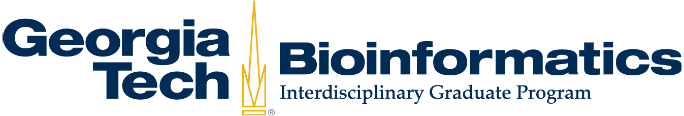

## Data access and quality control

### BIOS 4150/BIOL 6150
#### Instructor: Dr. King Jordan
#### TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)


---

# **1. Accessing raw exome read data from 1000 genomes project**
### *50 points*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Download the exome file</h3>
    <p>Locate files on the FTP site using the SRR identifiers. (https://www.internationalgenome.org/data-portal/sample/HG01890)</p>
</div>

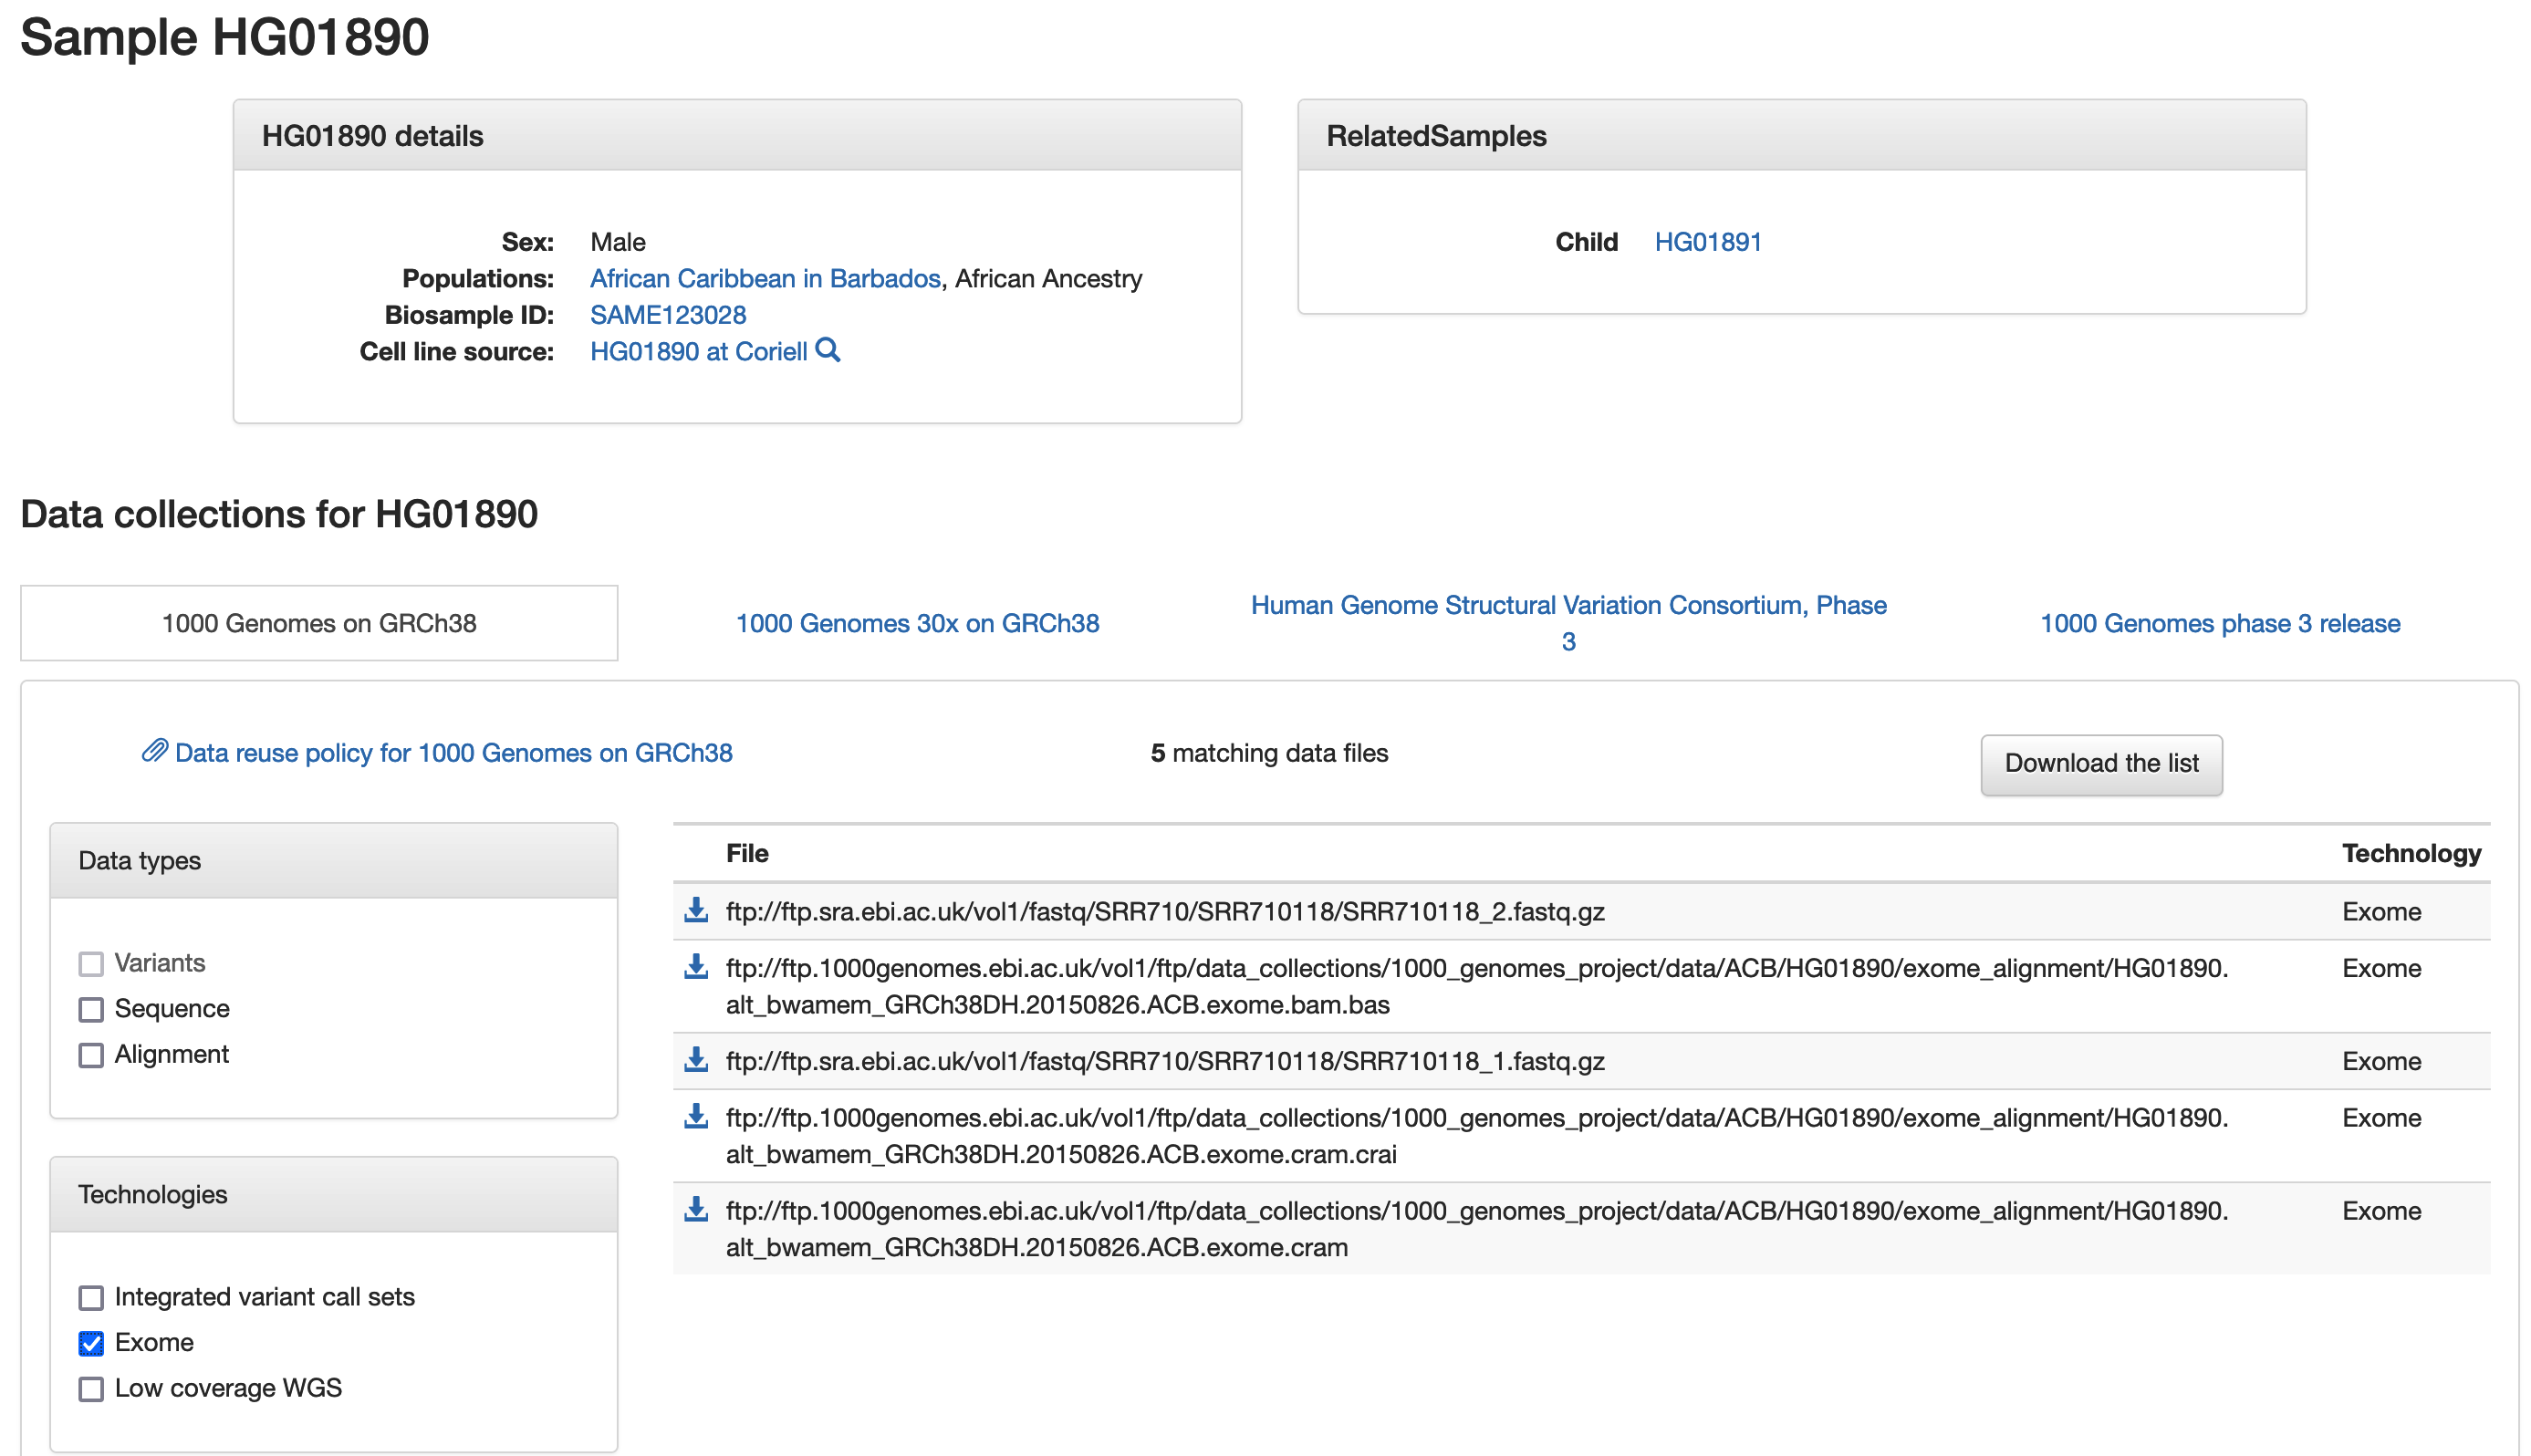

In [2]:
!fastqc --help


            FastQC - A high throughput sequence QC analysis tool

SYNOPSIS

	fastqc seqfile1 seqfile2 .. seqfileN

    fastqc [-o output dir] [--(no)extract] [-f fastq|bam|sam] 
           [-c contaminant file] seqfile1 .. seqfileN

DESCRIPTION

    FastQC reads a set of sequence files and produces from each one a quality
    control report consisting of a number of different modules, each one of 
    which will help to identify a different potential type of problem in your
    data.
    
    If no files to process are specified on the command line then the program
    will start as an interactive graphical application.  If files are provided
    on the command line then the program will run with no user interaction
    required.  In this mode it is suitable for inclusion into a standardised
    analysis pipeline.
    
    The options for the program as as follows:
    
    -h --help       Print this help file and exit
    
    -v --version    Print the version of the program and exit

In [3]:
#Download the file.
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG01890/sequence_read/SRR710118_1.filt.fastq.gz
!wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG01890/sequence_read/SRR710118_2.filt.fastq.gz
    

--2023-10-04 10:36:07--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG01890/sequence_read/SRR710118_1.filt.fastq.gz
           => ‘SRR710118_1.filt.fastq.gz.1’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.193.167
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.193.167|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/HG01890/sequence_read ... done.
==> SIZE SRR710118_1.filt.fastq.gz ... 3518758058
==> PASV ... done.    ==> RETR SRR710118_1.filt.fastq.gz ... done.
Length: 3518758058 (3.3G) (unauthoritative)

SRR710118_1.filt.fa 100%[===================>]   3.28G  36.2MB/s    in 96s     

2023-10-04 10:37:44 (34.9 MB/s) - ‘SRR710118_1.filt.fastq.gz.1’ saved [3518758058]

--2023-10-04 10:37:45--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/HG01890/sequence_read/SRR710118_2.filt.fastq.gz
           => ‘SRR710118_2.

In [4]:
#Move the files.

###We will move them to ~/scratch today, but for the project, 
###you might want to move the files to the Shared folder.


!mkdir -p ~/scratch/DataAccessQC/
!mv SRR710118_1.filt.fastq.gz ~/scratch/DataAccessQC/
!mv SRR710118_2.filt.fastq.gz ~/scratch/DataAccessQC/

In [7]:
#Have a quick look at the files downloaded.
!zcat ~/scratch/DataAccessQC/SRR710118_1.filt.fastq.gz | head 
!echo "----"
!zcat ~/scratch/DataAccessQC/SRR710118_2.filt.fastq.gz | head 

@SRR710118.2 HWI-ST805:316:D1MN1ACXX:2:1101:1478:2200/1
CCTGGTCTTCAGGTTGCAAAGACTGTGGGAAAAGCATAGTATCTGGGCCAGAATGCACCACCCCTCATGGCACAGTCCTTCACAGCTTCCCTTGTCTAGAA
+
CCCFFFFFHGHHGFHIJJJJJJGEF:CFFEGGDFGGEHIBHIIHGFGGHIEIJHIH@>=BBFFHIIJHHHGEFFFFFDEEEEEDDBDDCDCDDDD3>BAA>
@SRR710118.3 HWI-ST805:316:D1MN1ACXX:2:1101:1741:2227/1
TATCTCAATTTTTTTTCTTAGATGTTAAGAAGCAGCAACAAATGGCAGCACTTACAAAAGAAAAGGACCAATTATCTCAGTCTATTGTTATGTATAAAAGT
+
@?@BDDABFFHBHIBIHIGHHIIA?D@G<4DFDDF@HEIII2B>FGGI7FGGHIGI>CEAEE>?@?BBB<ACC>CCCCCC>A>CDC@;@>AC@:BC(::@>
@SRR710118.5 HWI-ST805:316:D1MN1ACXX:2:1101:1940:2179/1
CGTGAAGTCTCTTTCTTGGCATTGGATGAACAGAAAGTTTGCTCCGCTCAGGATGTTGACAGGGATTACTCCAATCCCAAATGGGTGGAACCCTACATAGC

gzip: stdout: Broken pipe
----
@SRR710118.2 HWI-ST805:316:D1MN1ACXX:2:1101:1478:2200/2
TCACCTCACCTGGGAATTGCAAAGGGTCGGGGAACTCCCTCTTCTAGACAAGGGAAGCTGTGAAGGACTGTGCCATGAGGGGTGGTGCATTCTGGCCCAGA
+
B@CFDFDFFHHDHEIIJJJJJIGHIJC?DEGH:FGDH>GHGEHFHGI<@GHIIGCHFBEDDCDD>@>=CB@@CCCCC@CCBB&5@5?C4@C>CDC@<80?A
@SRR710118.3 HWI-ST805:3

<div class="alert alert-block alert-warning">
    <h3>1.2 Some manual checks</h3>
    <p>Once you have downloaded the files, here are a few checks you can do:</p>
    <p>1. See if there is checksum for the files, if yes then you might want to verify it, specially for larger file.</p>
    <p>2. If you downloaded paired read files, check if the headers look proper</p>
    <p>3. Glance over the headers and get a sense of the number of nucleotides, sequencing platform etc</p>
</div>

## **2. Annotating a VCF file**
### *150 points*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Check if you can use fastQC</h3>
    <p>We will be using fastQC for quality control of NGS data. Check the documentation here: https://www.bioinformatics.babraham.ac.uk/projects/fastqc/</p>
</div>

In [9]:
!fastqc --help


            FastQC - A high throughput sequence QC analysis tool

SYNOPSIS

	fastqc seqfile1 seqfile2 .. seqfileN

    fastqc [-o output dir] [--(no)extract] [-f fastq|bam|sam] 
           [-c contaminant file] seqfile1 .. seqfileN

DESCRIPTION

    FastQC reads a set of sequence files and produces from each one a quality
    control report consisting of a number of different modules, each one of 
    which will help to identify a different potential type of problem in your
    data.
    
    If no files to process are specified on the command line then the program
    will start as an interactive graphical application.  If files are provided
    on the command line then the program will run with no user interaction
    required.  In this mode it is suitable for inclusion into a standardised
    analysis pipeline.
    
    The options for the program as as follows:
    
    -h --help       Print this help file and exit
    
    -v --version    Print the version of the program and exit

In [11]:
#Create a directory for QC results.
!mkdir -p ~/scratch/DataAccessQC/fastQCBeforeTrimming
!mkdir -p ~/scratch/DataAccessQC/Trimming
!mkdir -p ~/scratch/DataAccessQC/fastQCAfterTrimming

<div class="alert alert-block alert-warning">
    <h3>2.2 Run fastQC</h3>
    <p>We will be using fastQC for quality control of NGS data</p>
</div>

In [12]:
#Run fastqc.
!fastqc -o ~/scratch/DataAccessQC/fastQCBeforeTrimming/ ~/scratch/DataAccessQC/SRR710118_1.filt.fastq.gz ~/scratch/DataAccessQC/SRR710118_2.filt.fastq.gz



application/gzip
application/gzip
Started analysis of SRR710118_1.filt.fastq.gz
Approx 5% complete for SRR710118_1.filt.fastq.gz
Approx 10% complete for SRR710118_1.filt.fastq.gz
Approx 15% complete for SRR710118_1.filt.fastq.gz
Approx 20% complete for SRR710118_1.filt.fastq.gz
Approx 25% complete for SRR710118_1.filt.fastq.gz
Approx 30% complete for SRR710118_1.filt.fastq.gz
Approx 35% complete for SRR710118_1.filt.fastq.gz
Approx 40% complete for SRR710118_1.filt.fastq.gz
Approx 45% complete for SRR710118_1.filt.fastq.gz
Approx 50% complete for SRR710118_1.filt.fastq.gz
Approx 55% complete for SRR710118_1.filt.fastq.gz
Approx 60% complete for SRR710118_1.filt.fastq.gz
Approx 65% complete for SRR710118_1.filt.fastq.gz
Approx 70% complete for SRR710118_1.filt.fastq.gz
Approx 75% complete for SRR710118_1.filt.fastq.gz
Approx 80% complete for SRR710118_1.filt.fastq.gz
Approx 85% complete for SRR710118_1.filt.fastq.gz
Approx 90% complete for SRR710118_1.filt.fastq.gz
Approx 95% complete f

<div class="alert alert-block alert-warning">
    <h3>2.2 Check out the result files</h3>
    <p>Tools have their own ways of reporting results. It's usually a good idea to look at output files in addition to the manuals.</p>
</div>

## 2.2.1 Forward and backward per base sequence quality

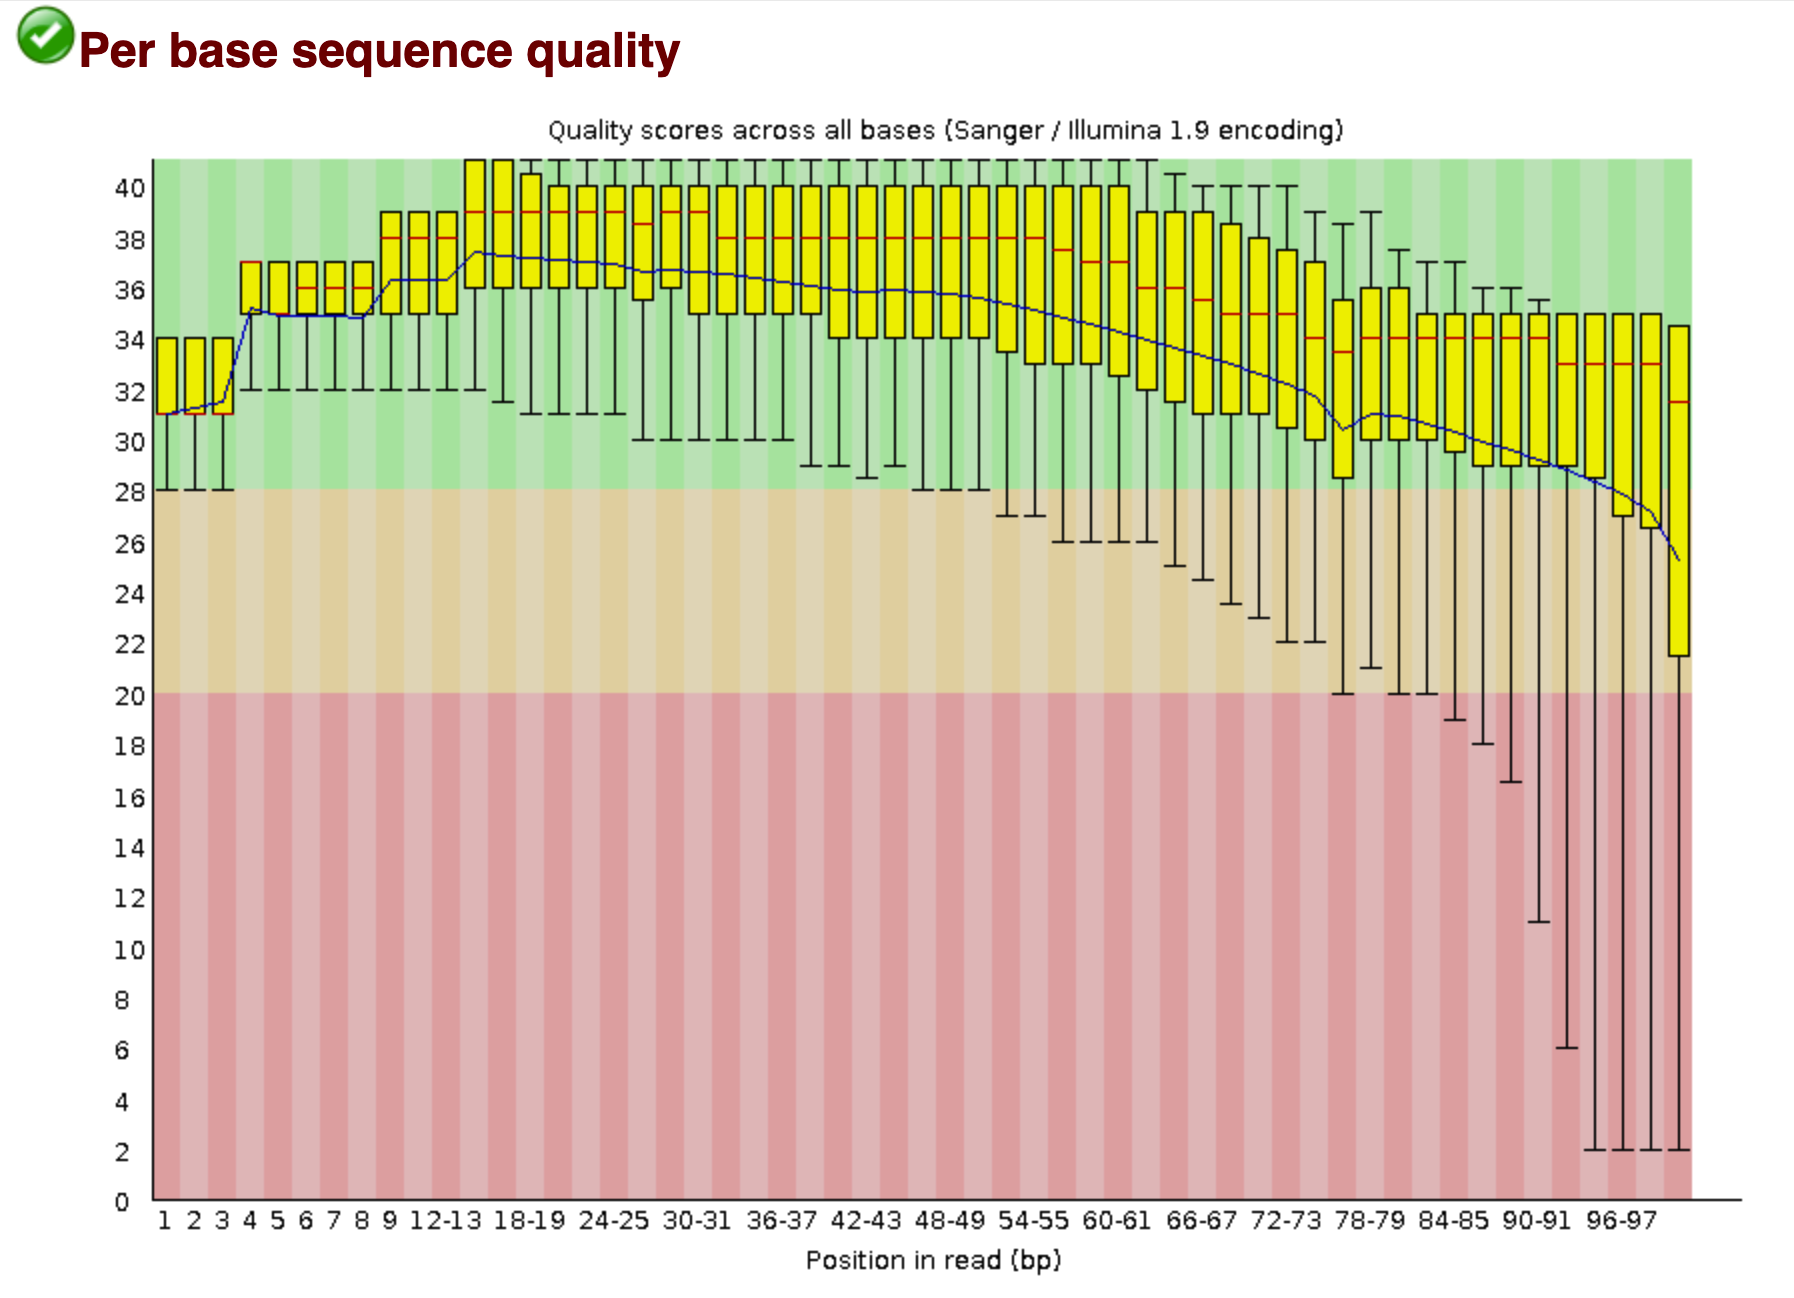

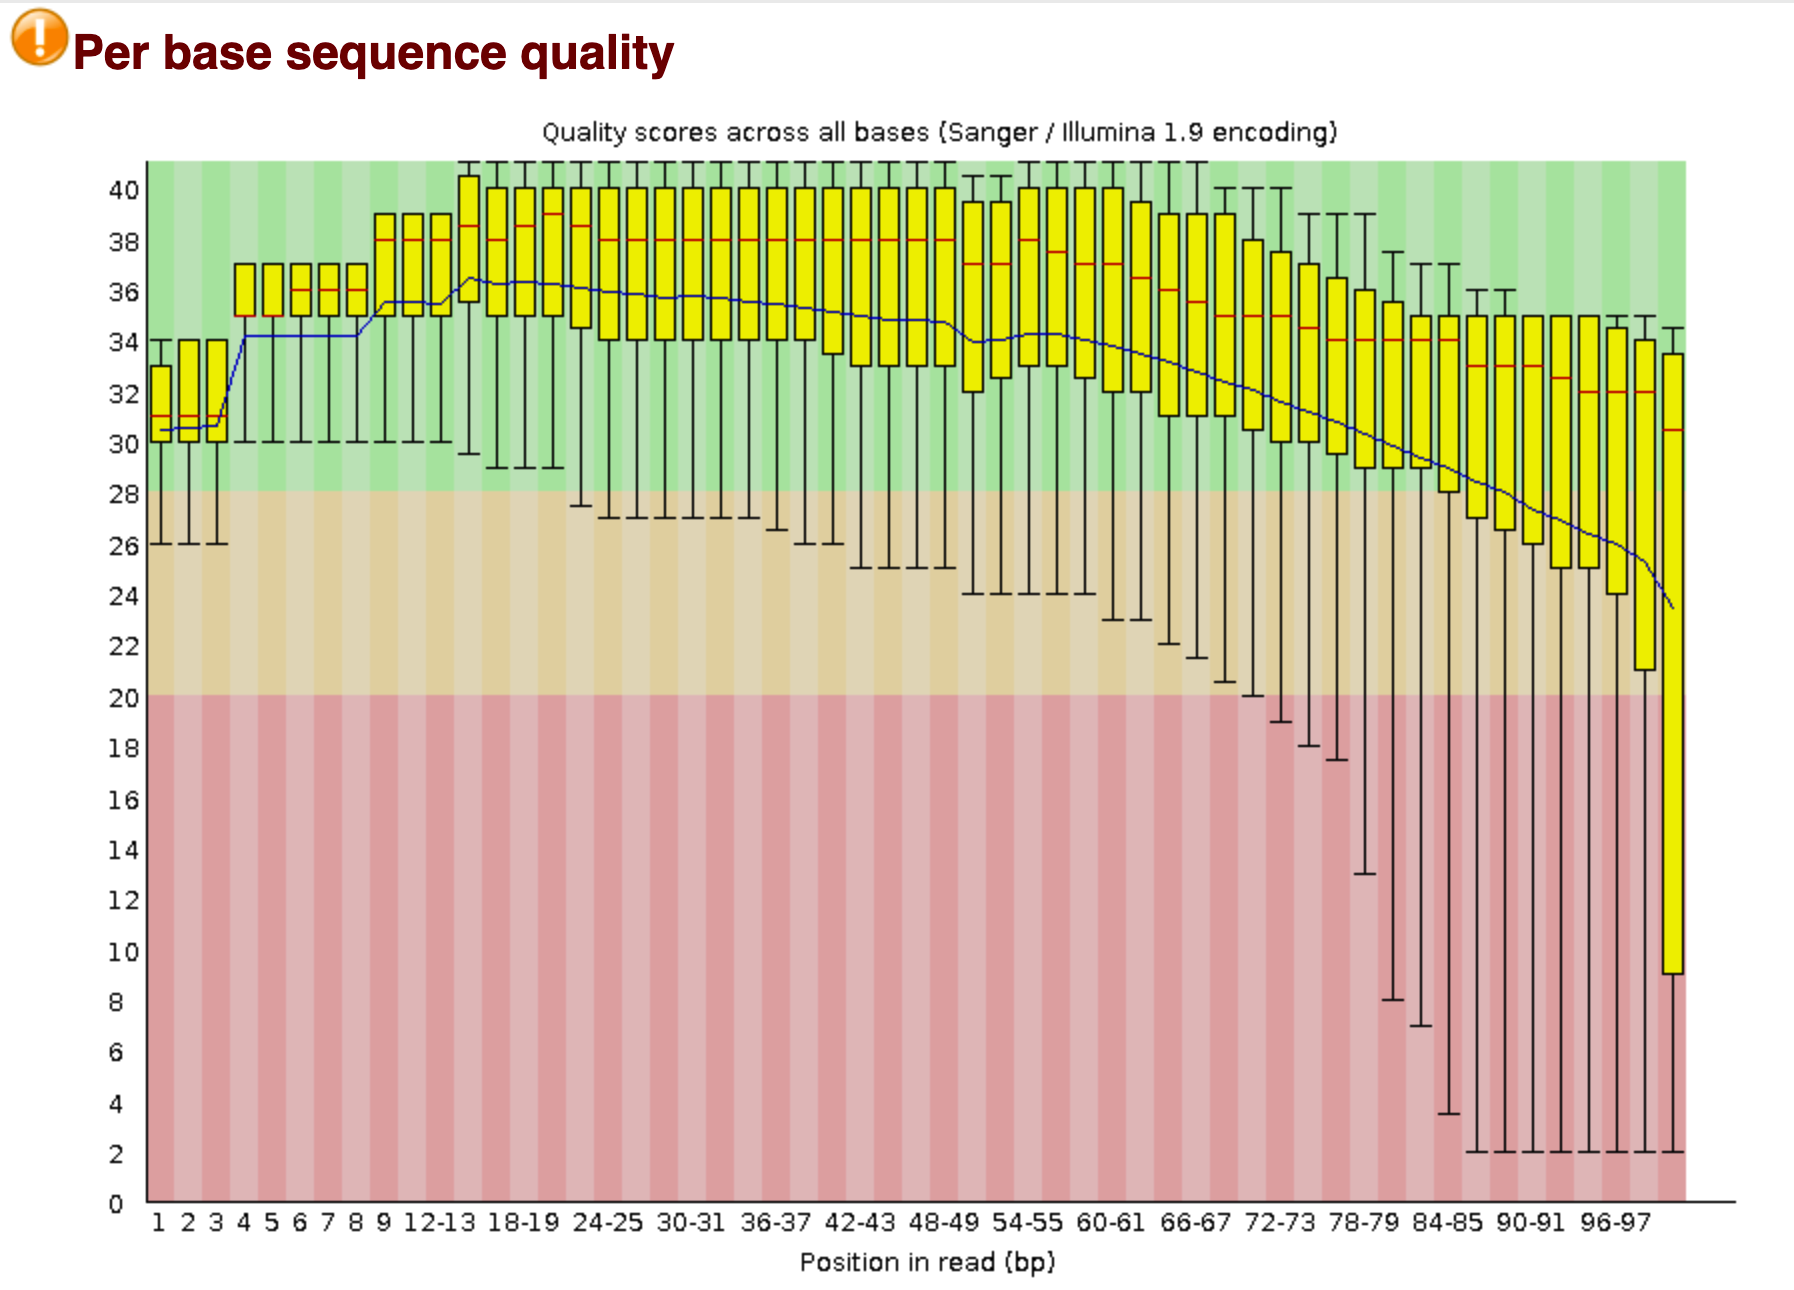

## 2.2.2 Forward and backward per sequence content

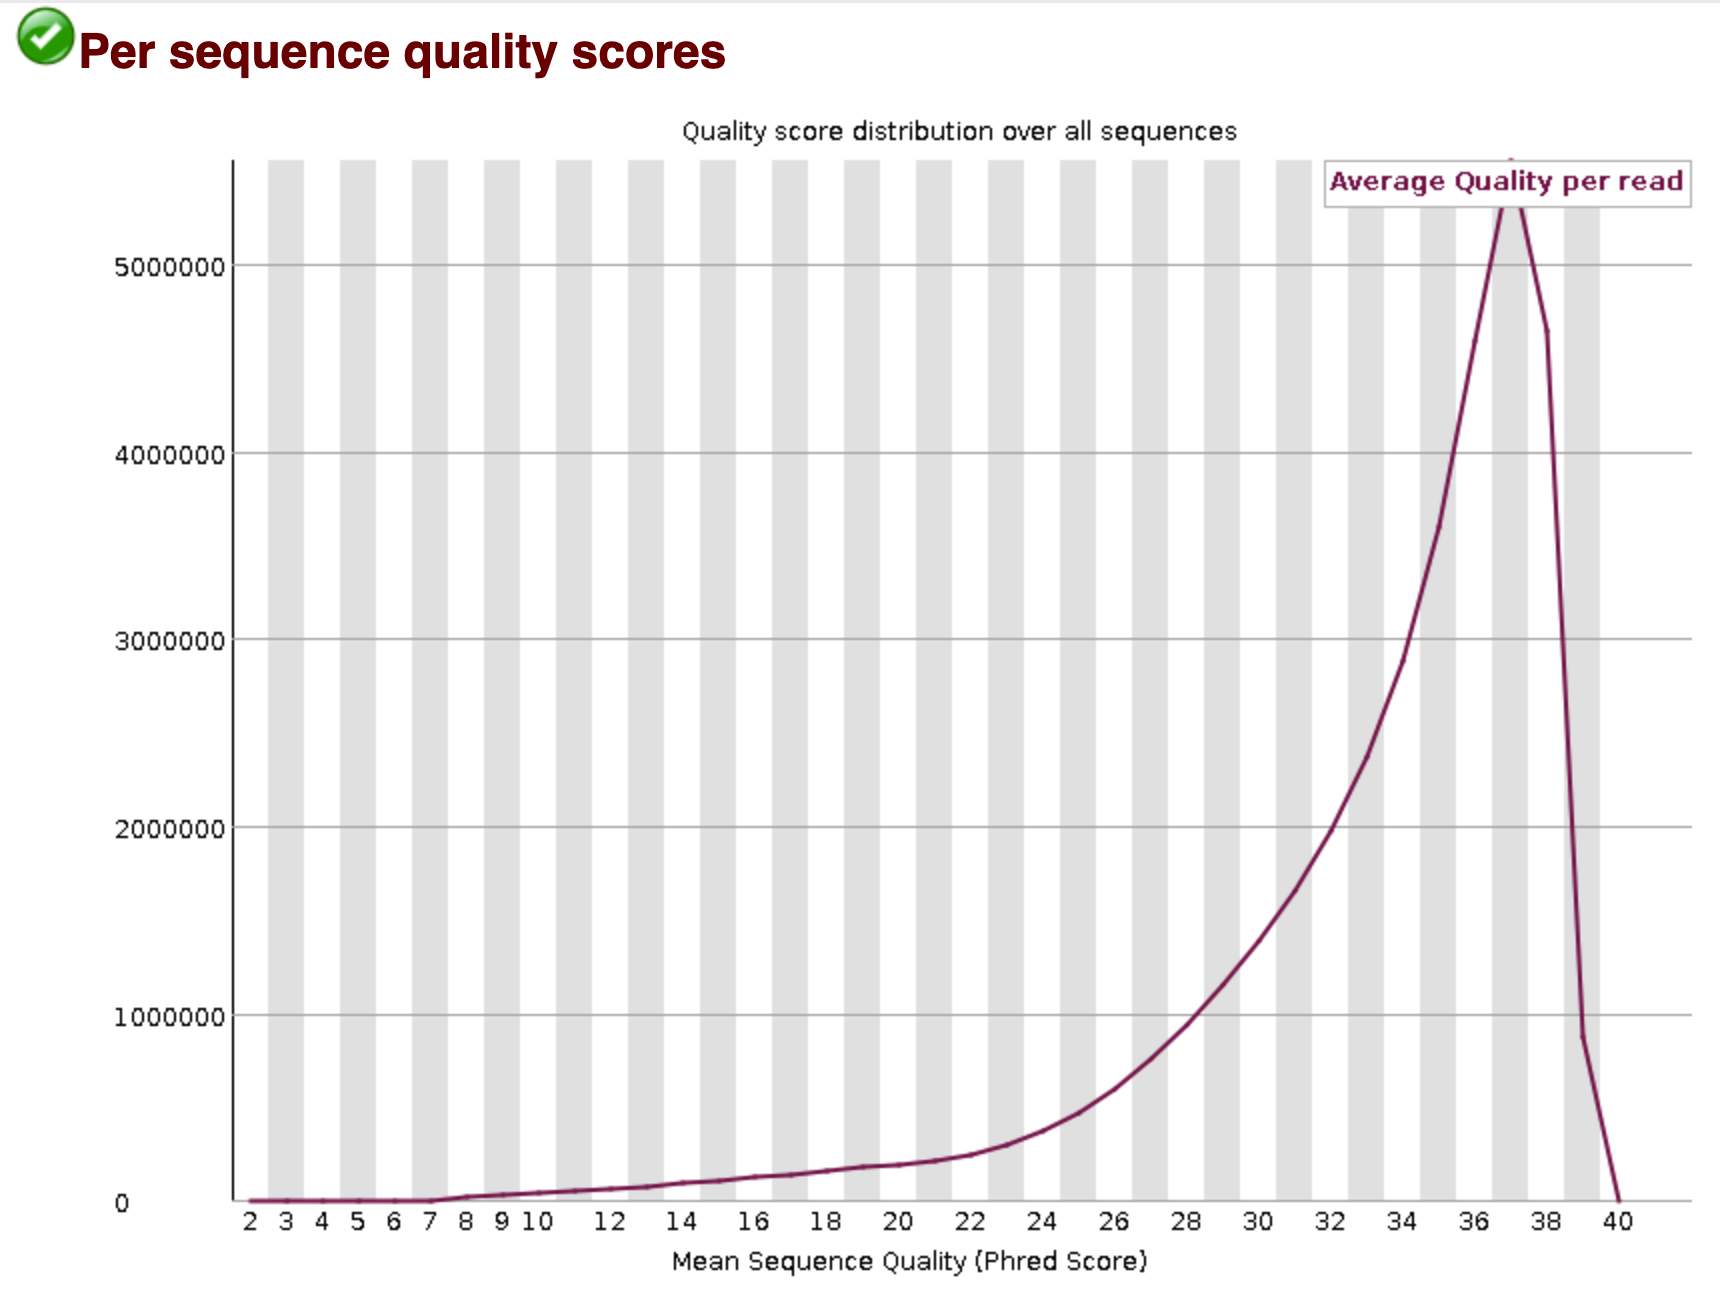

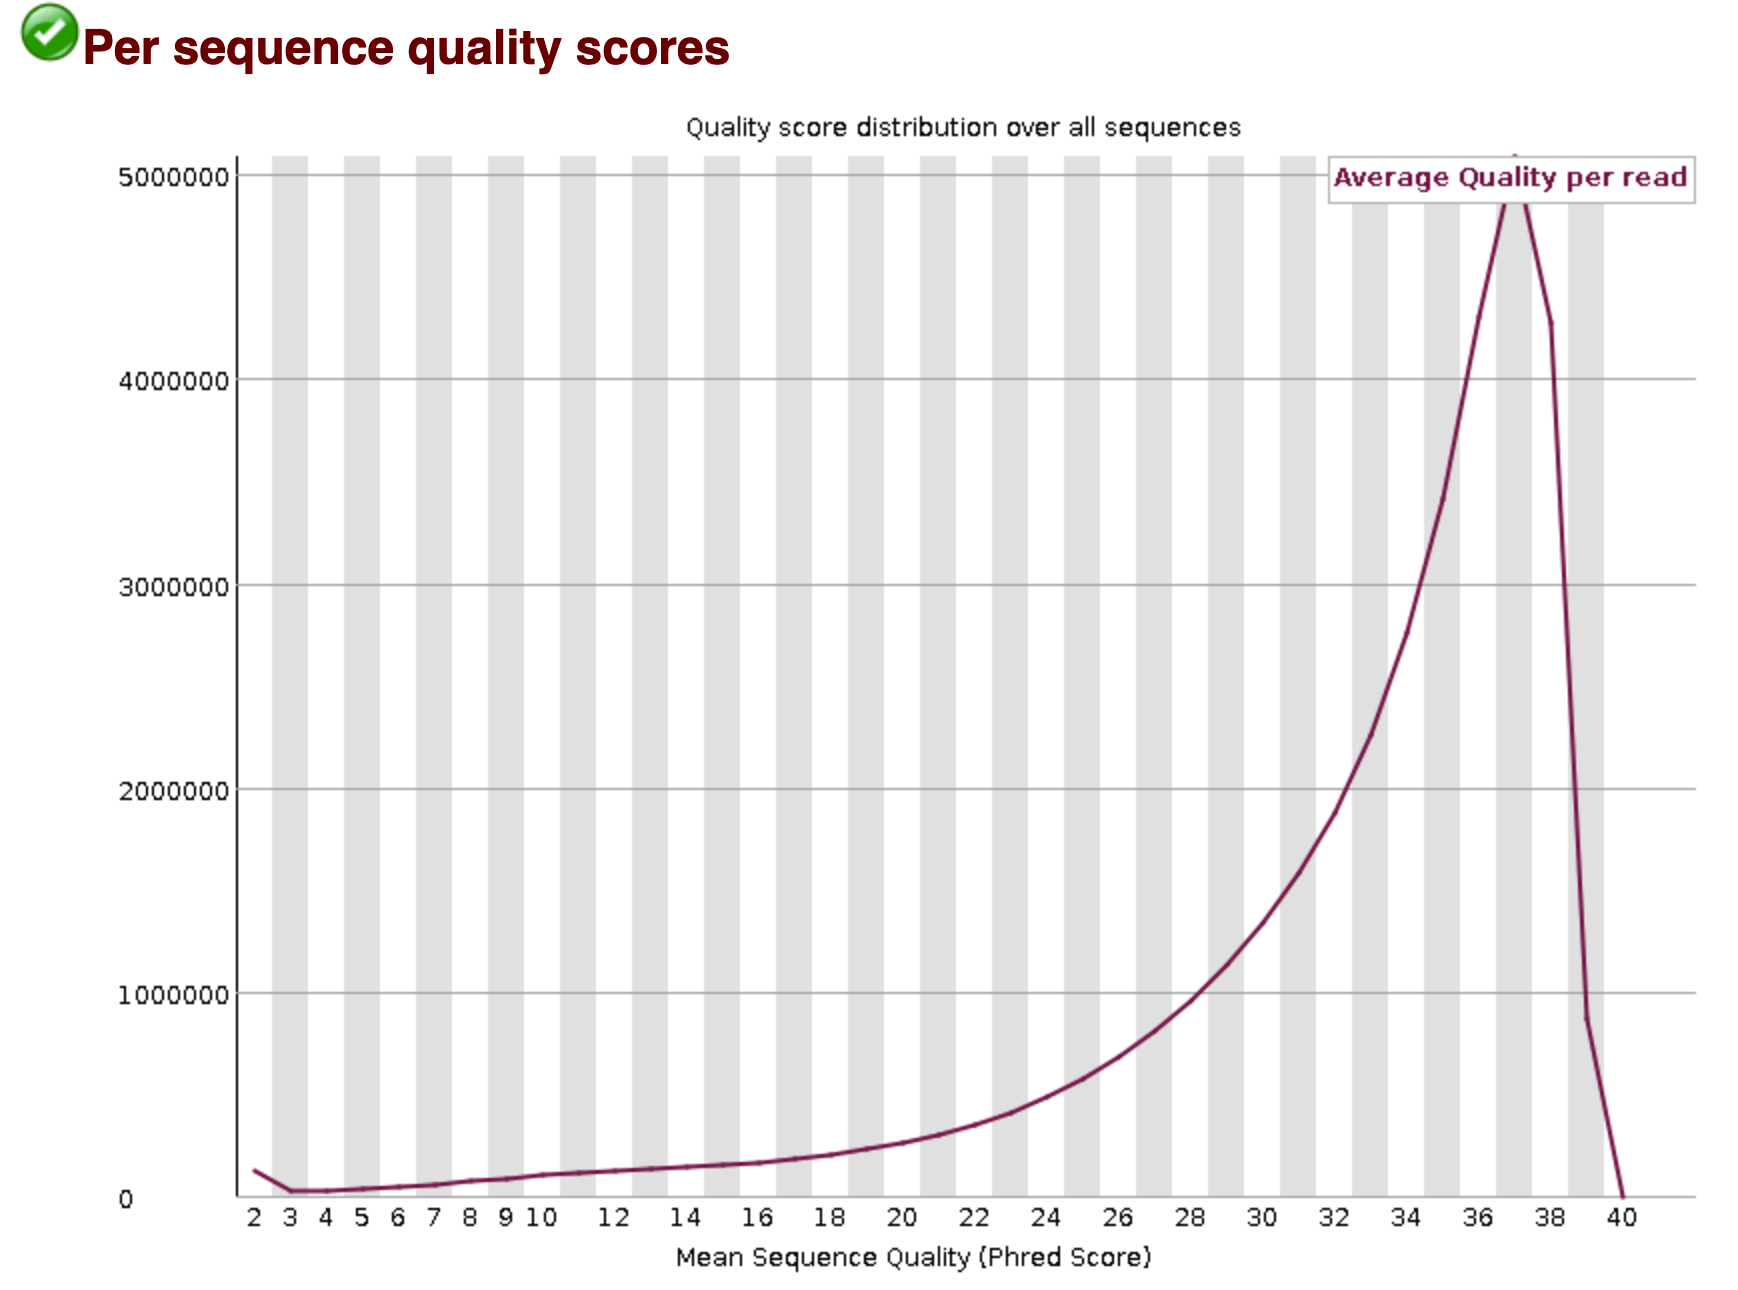

## 2.2.3 Forward and backward per base sequence content

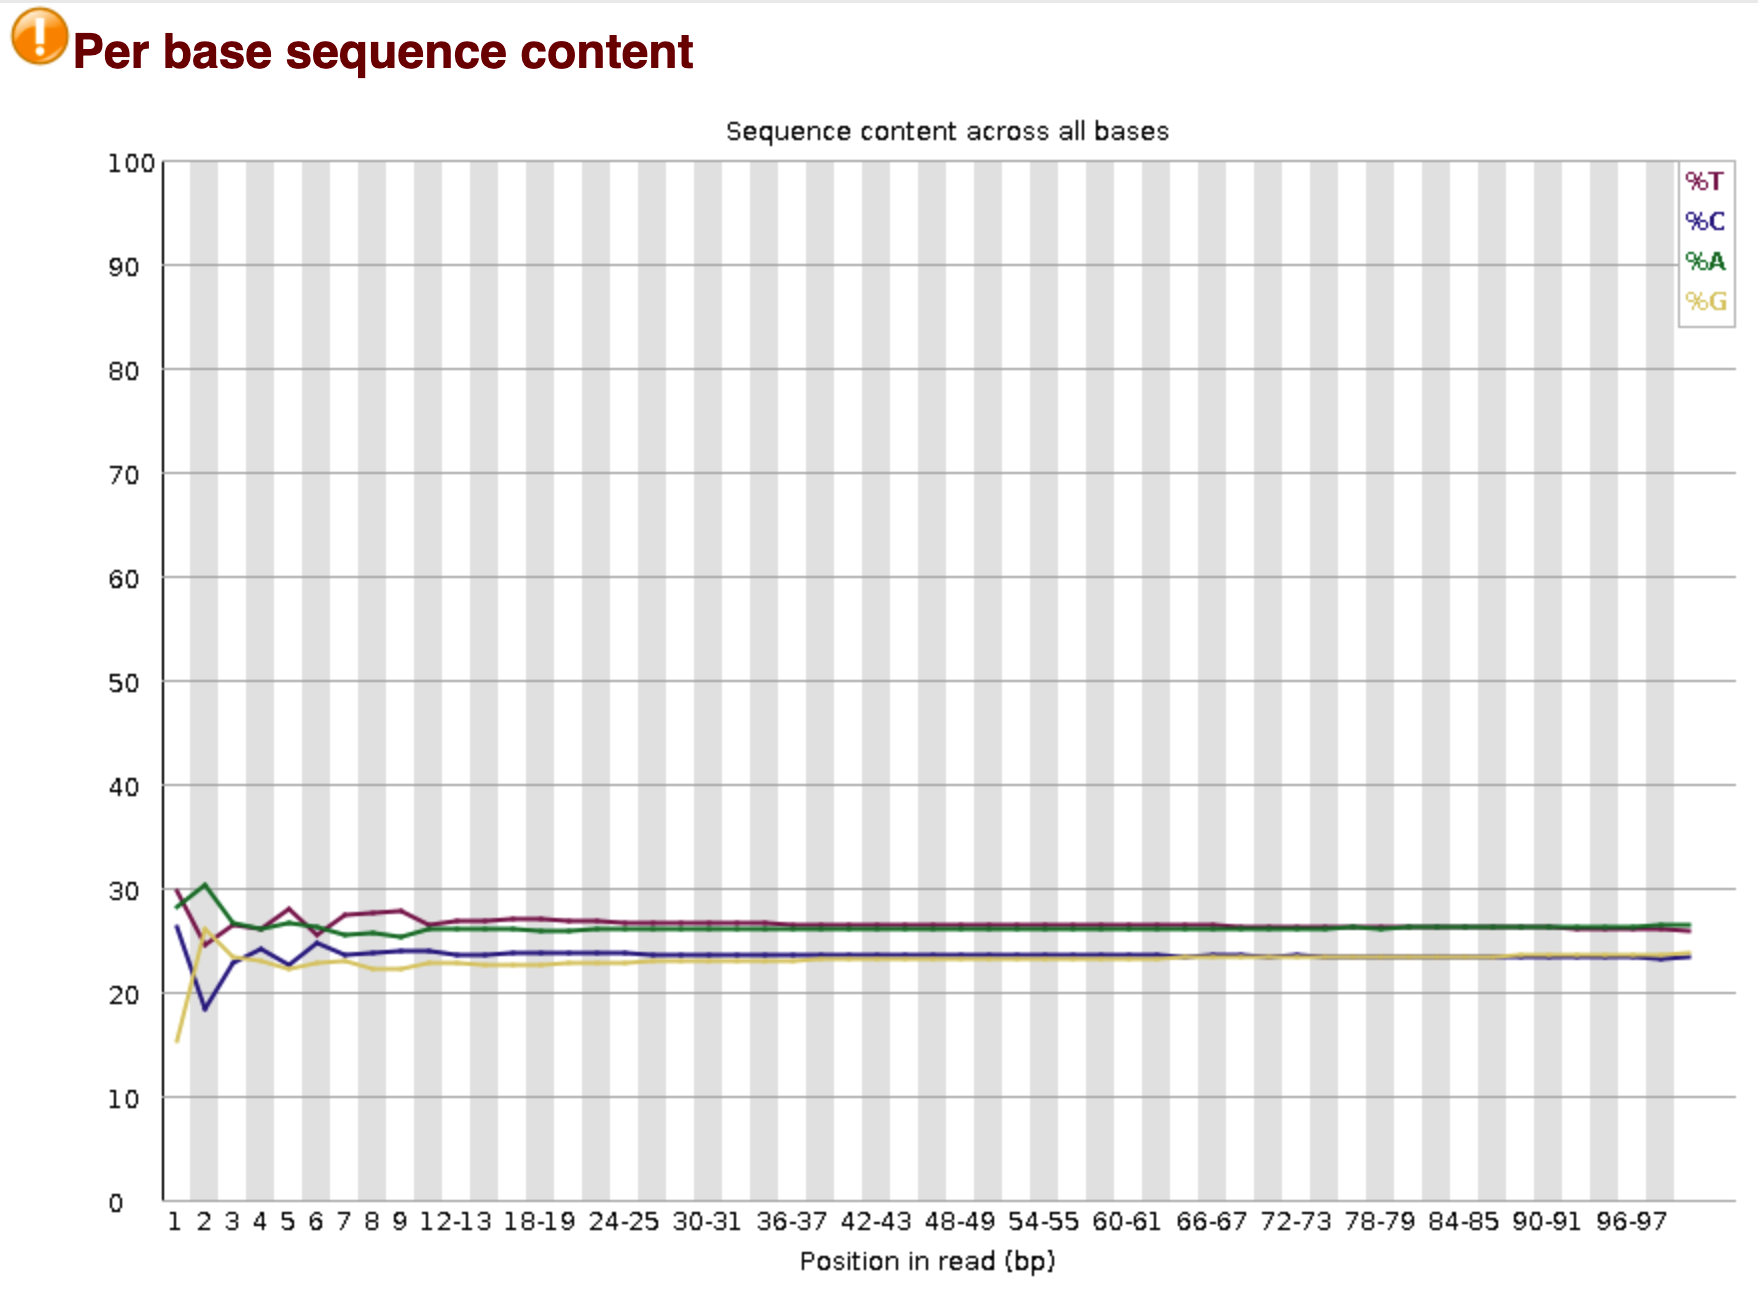

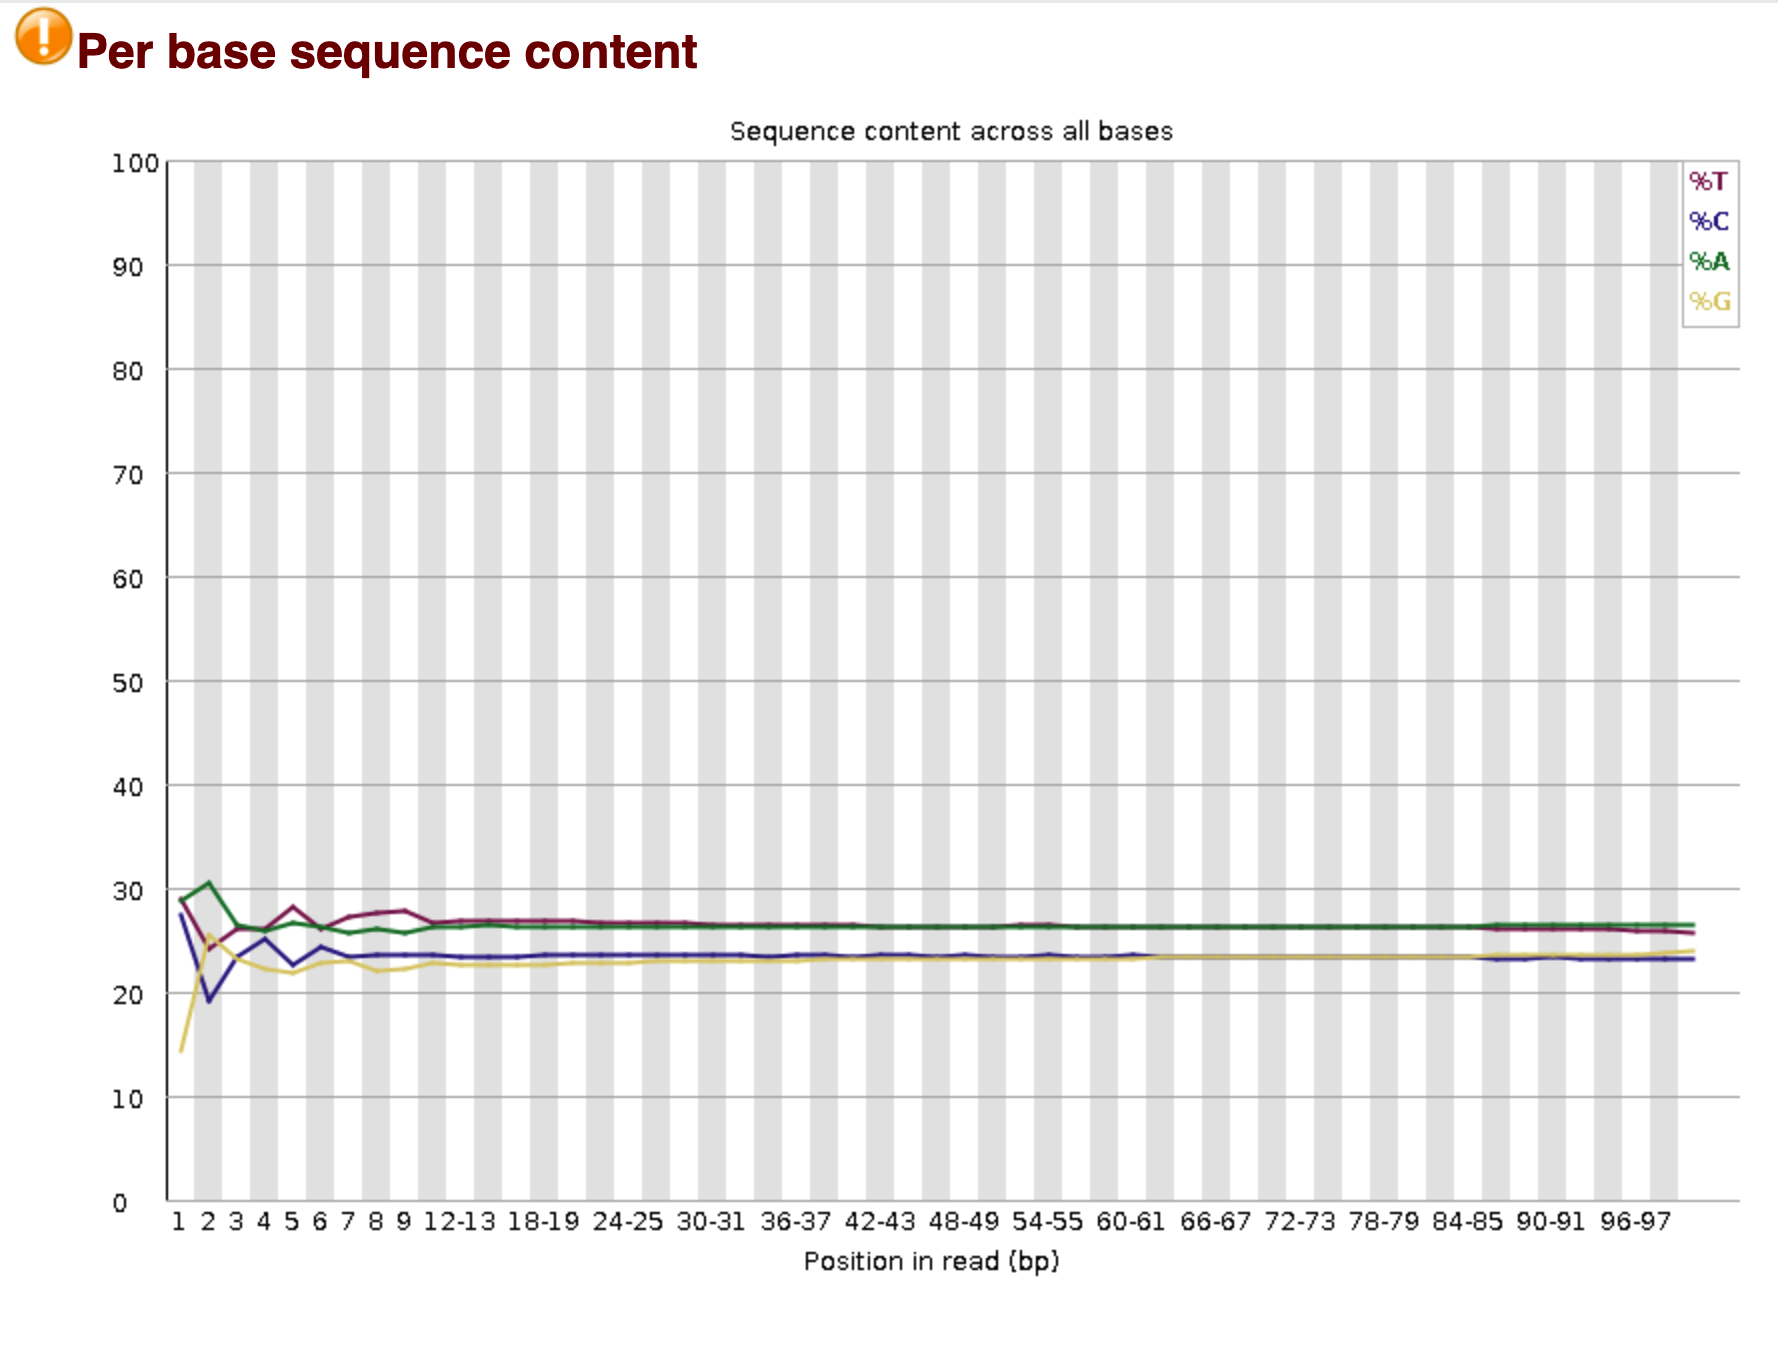

<div class="alert alert-block alert-warning">
    <h3>2.3 Check if you can use fastp</h3>
    <p>We will be using fastp for trimming of NGS data. Another option is trimmomatic</p>
</div>

In [15]:
!fastp --help

usage: fastp [options] ... 
options:
  -i, --in1                            read1 input file name (string [=])
  -o, --out1                           read1 output file name (string [=])
  -I, --in2                            read2 input file name (string [=])
  -O, --out2                           read2 output file name (string [=])
      --unpaired1                      for PE input, if read1 passed QC but read2 not, it will be written to unpaired1. Default is to discard it. (string [=])
      --unpaired2                      for PE input, if read2 passed QC but read1 not, it will be written to unpaired2. If --unpaired2 is same as --unpaired1 (default mode), both unpaired reads will be written to this same file. (string [=])
      --overlapped_out                 for each read pair, output the overlapped region if it has no any mismatched base. (string [=])
      --failed_out                     specify the file to store reads that cannot pass the filters. (string [=])
  -m, --merge  

In [18]:
#Run the trimming.

#Check the trimming parameters.
!fastp -i ~/scratch/DataAccessQC/SRR710118_1.filt.fastq.gz -I ~/scratch/DataAccessQC/SRR710118_2.filt.fastq.gz -o ~/scratch/DataAccessQC/Trimming/SRR710118_1.Trimmed.fastq.gz -O ~/scratch/DataAccessQC/Trimming/SRR710118_2.Trimmed.fastq.gz -f 12 -t 15



Read1 before filtering:
total reads: 36039723
total bases: 3640012023
Q20 bases: 3415565787(93.8339%)
Q30 bases: 3060393656(84.0765%)

Read2 before filtering:
total reads: 36039723
total bases: 3640012023
Q20 bases: 3305686401(90.8153%)
Q30 bases: 2937924177(80.7119%)

Read1 after filtering:
total reads: 33770002
total bases: 2498252630
Q20 bases: 2418958102(96.826%)
Q30 bases: 2201000130(88.1016%)

Read2 after filtering:
total reads: 33770002
total bases: 2498252630
Q20 bases: 2393630673(95.8122%)
Q30 bases: 2162370270(86.5553%)

Filtering result:
reads passed filter: 67540004
reads failed due to low quality: 4469748
reads failed due to too many N: 69694
reads failed due to too short: 0
reads with adapter trimmed: 712528
bases trimmed due to adapters: 1502004

Duplication rate: 2.42701%

Insert size peak (evaluated by paired-end reads): 141

JSON report: fastp.json
HTML report: fastp.html

fastp -i /home/hice1/ssharma454/scratch/DataAccessQC/SRR710118_1.filt.fastq.gz -I /home/hice1/ss

<div class="alert alert-block alert-warning">
    <h3>2.4 Check post trimming results using fastQC</h3>
    <p>We will be using fastQC for quality control of NGS data.</p>
</div>

In [19]:
#Run fastqc.
!fastqc -o ~/scratch/DataAccessQC/fastQCAfterTrimming/ ~/scratch/DataAccessQC/Trimming/SRR710118_1.Trimmed.fastq.gz ~/scratch/DataAccessQC/Trimming/SRR710118_2.Trimmed.fastq.gz



application/gzip
application/gzip
Started analysis of SRR710118_1.Trimmed.fastq.gz
Approx 5% complete for SRR710118_1.Trimmed.fastq.gz
Approx 10% complete for SRR710118_1.Trimmed.fastq.gz
Approx 15% complete for SRR710118_1.Trimmed.fastq.gz
Approx 20% complete for SRR710118_1.Trimmed.fastq.gz
Approx 25% complete for SRR710118_1.Trimmed.fastq.gz
Approx 30% complete for SRR710118_1.Trimmed.fastq.gz
Approx 35% complete for SRR710118_1.Trimmed.fastq.gz
Approx 40% complete for SRR710118_1.Trimmed.fastq.gz
Approx 45% complete for SRR710118_1.Trimmed.fastq.gz
Approx 50% complete for SRR710118_1.Trimmed.fastq.gz
Approx 55% complete for SRR710118_1.Trimmed.fastq.gz
Approx 60% complete for SRR710118_1.Trimmed.fastq.gz
Approx 65% complete for SRR710118_1.Trimmed.fastq.gz
Approx 70% complete for SRR710118_1.Trimmed.fastq.gz
Approx 75% complete for SRR710118_1.Trimmed.fastq.gz
Approx 80% complete for SRR710118_1.Trimmed.fastq.gz
Approx 85% complete for SRR710118_1.Trimmed.fastq.gz
Approx 90% comple

<div class="alert alert-block alert-warning">
    <h3>2.5 Results</h3>
    <p>We will be using fastQC for quality control of NGS data.</p>
</div>

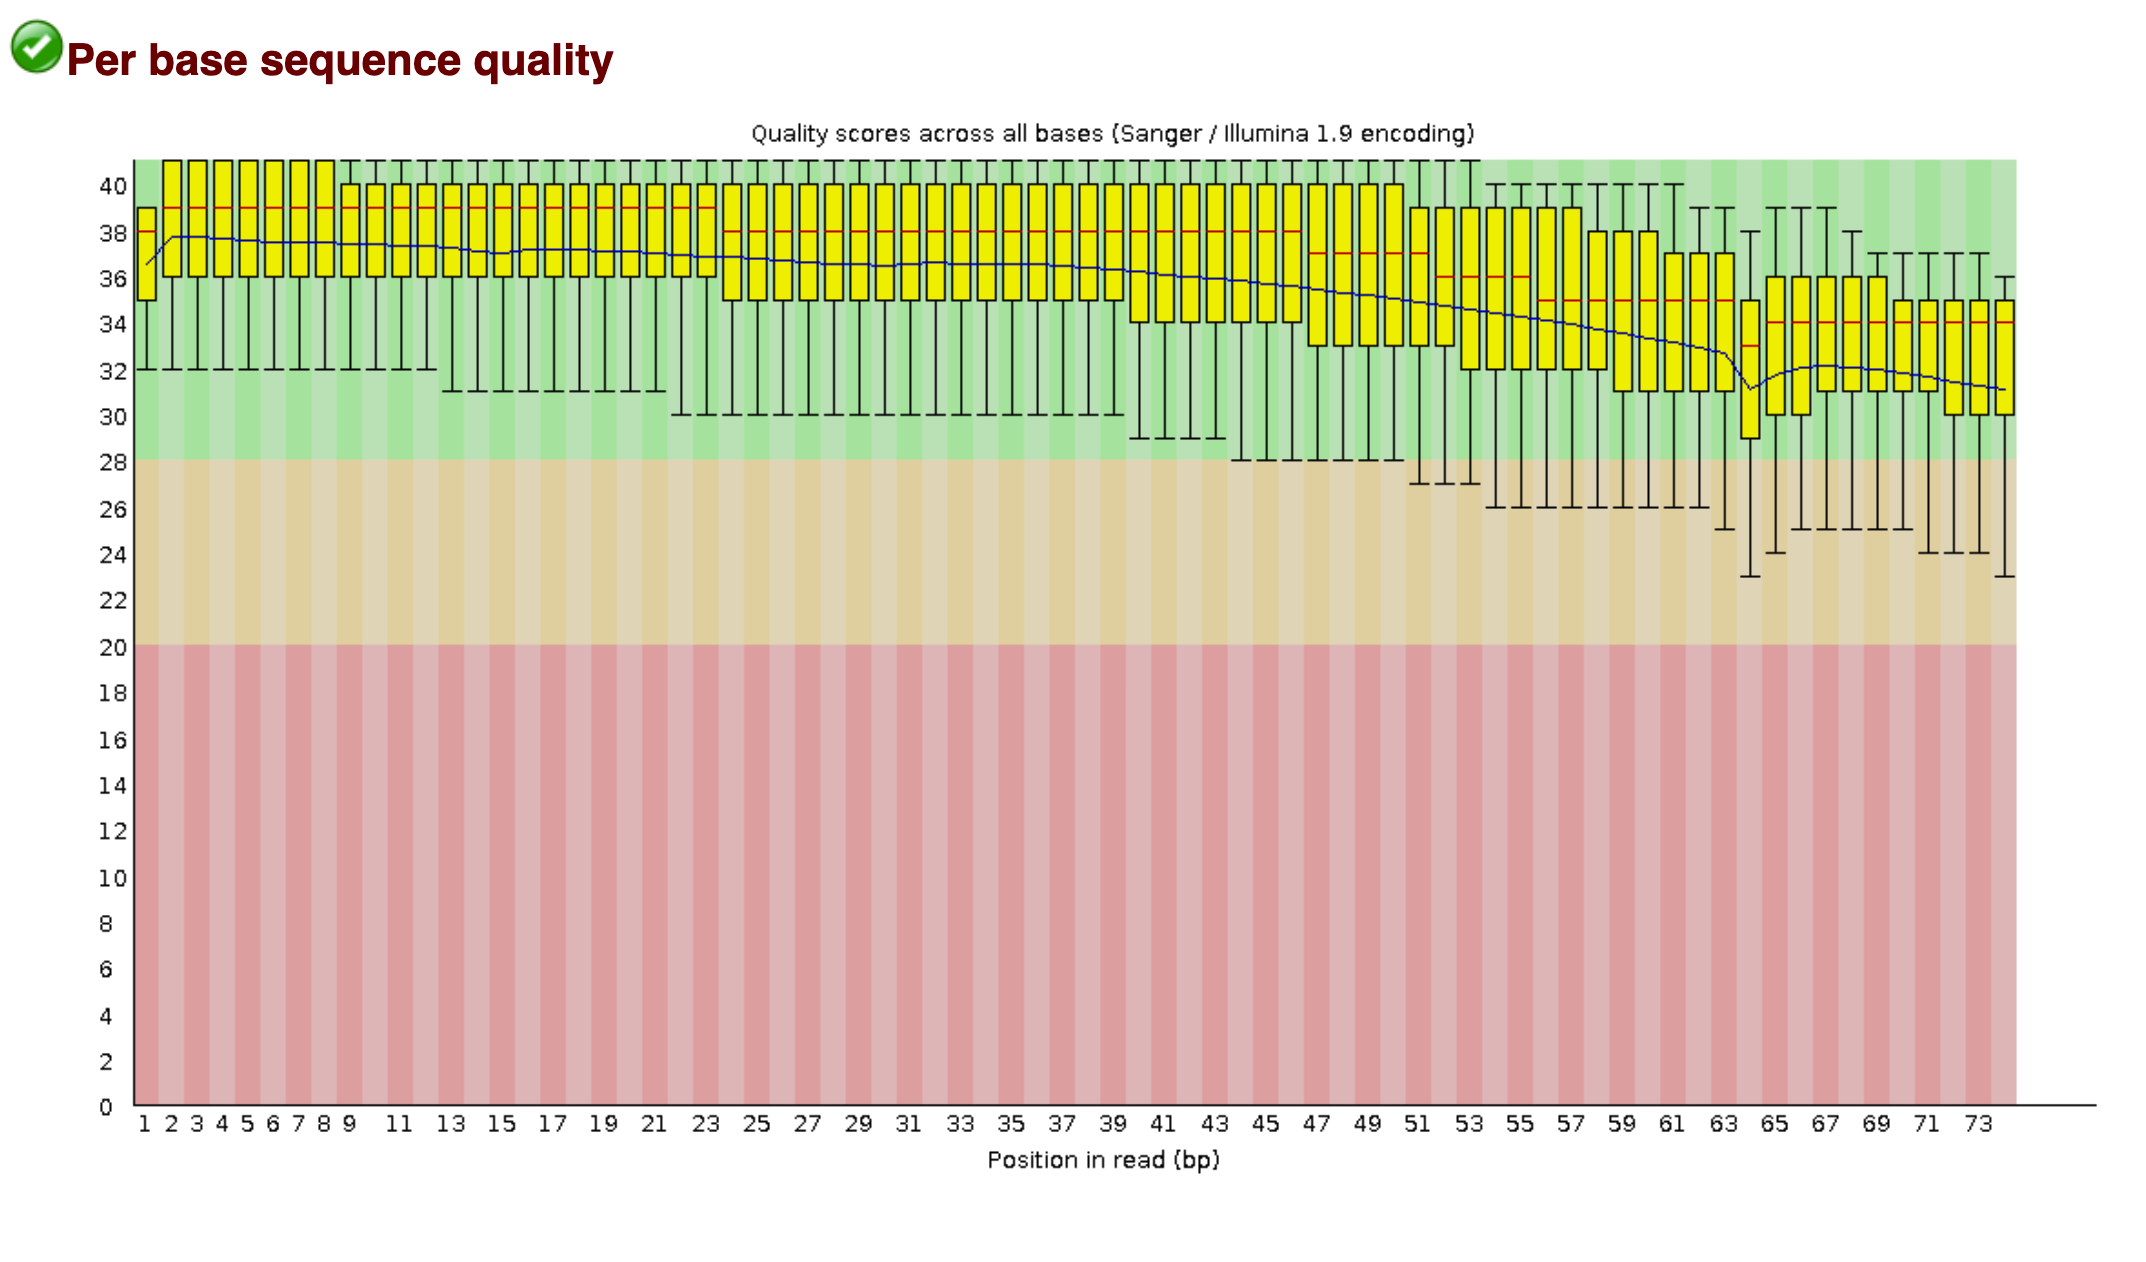

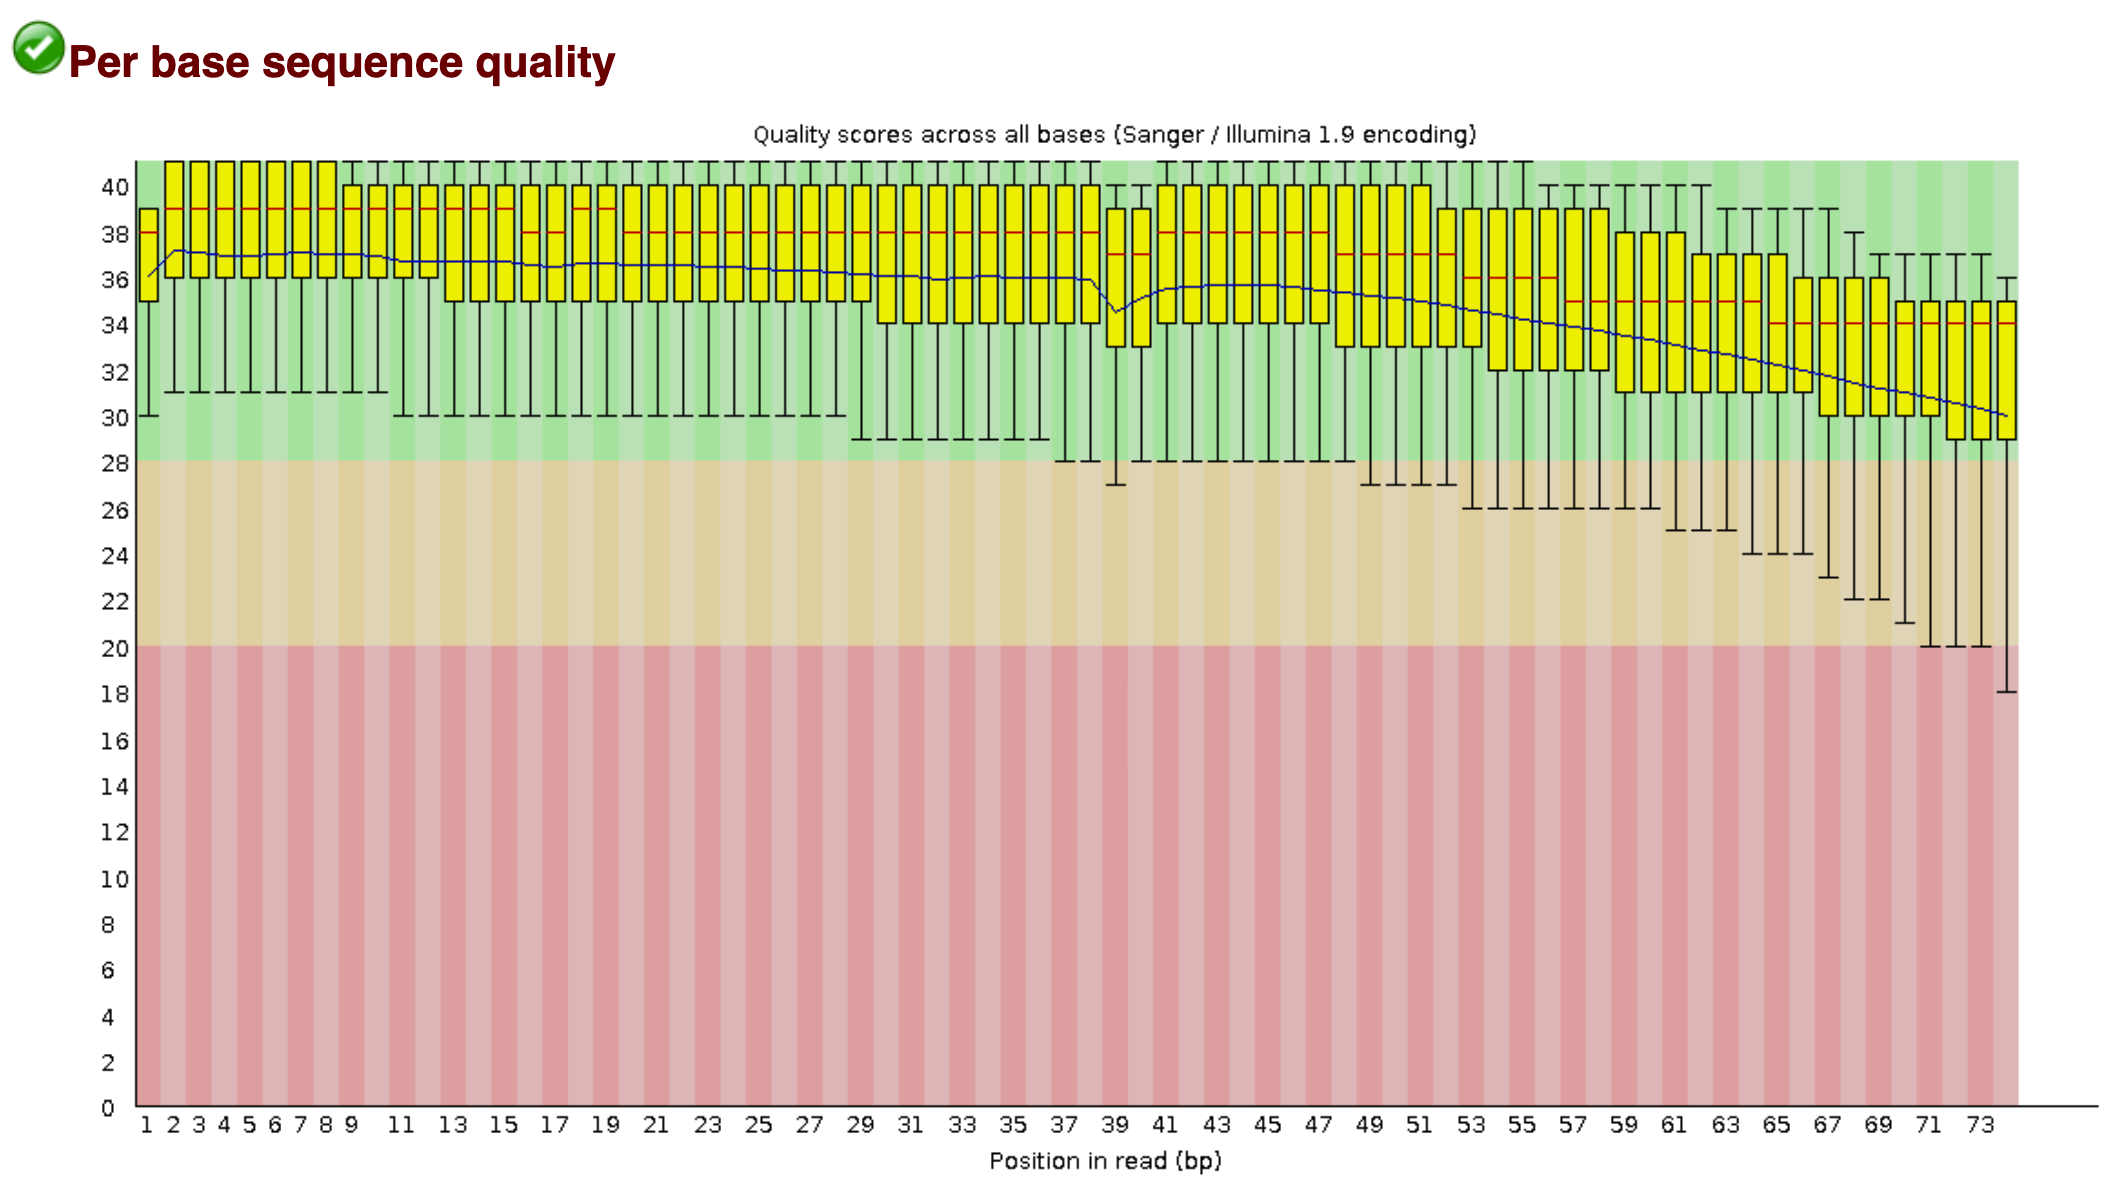

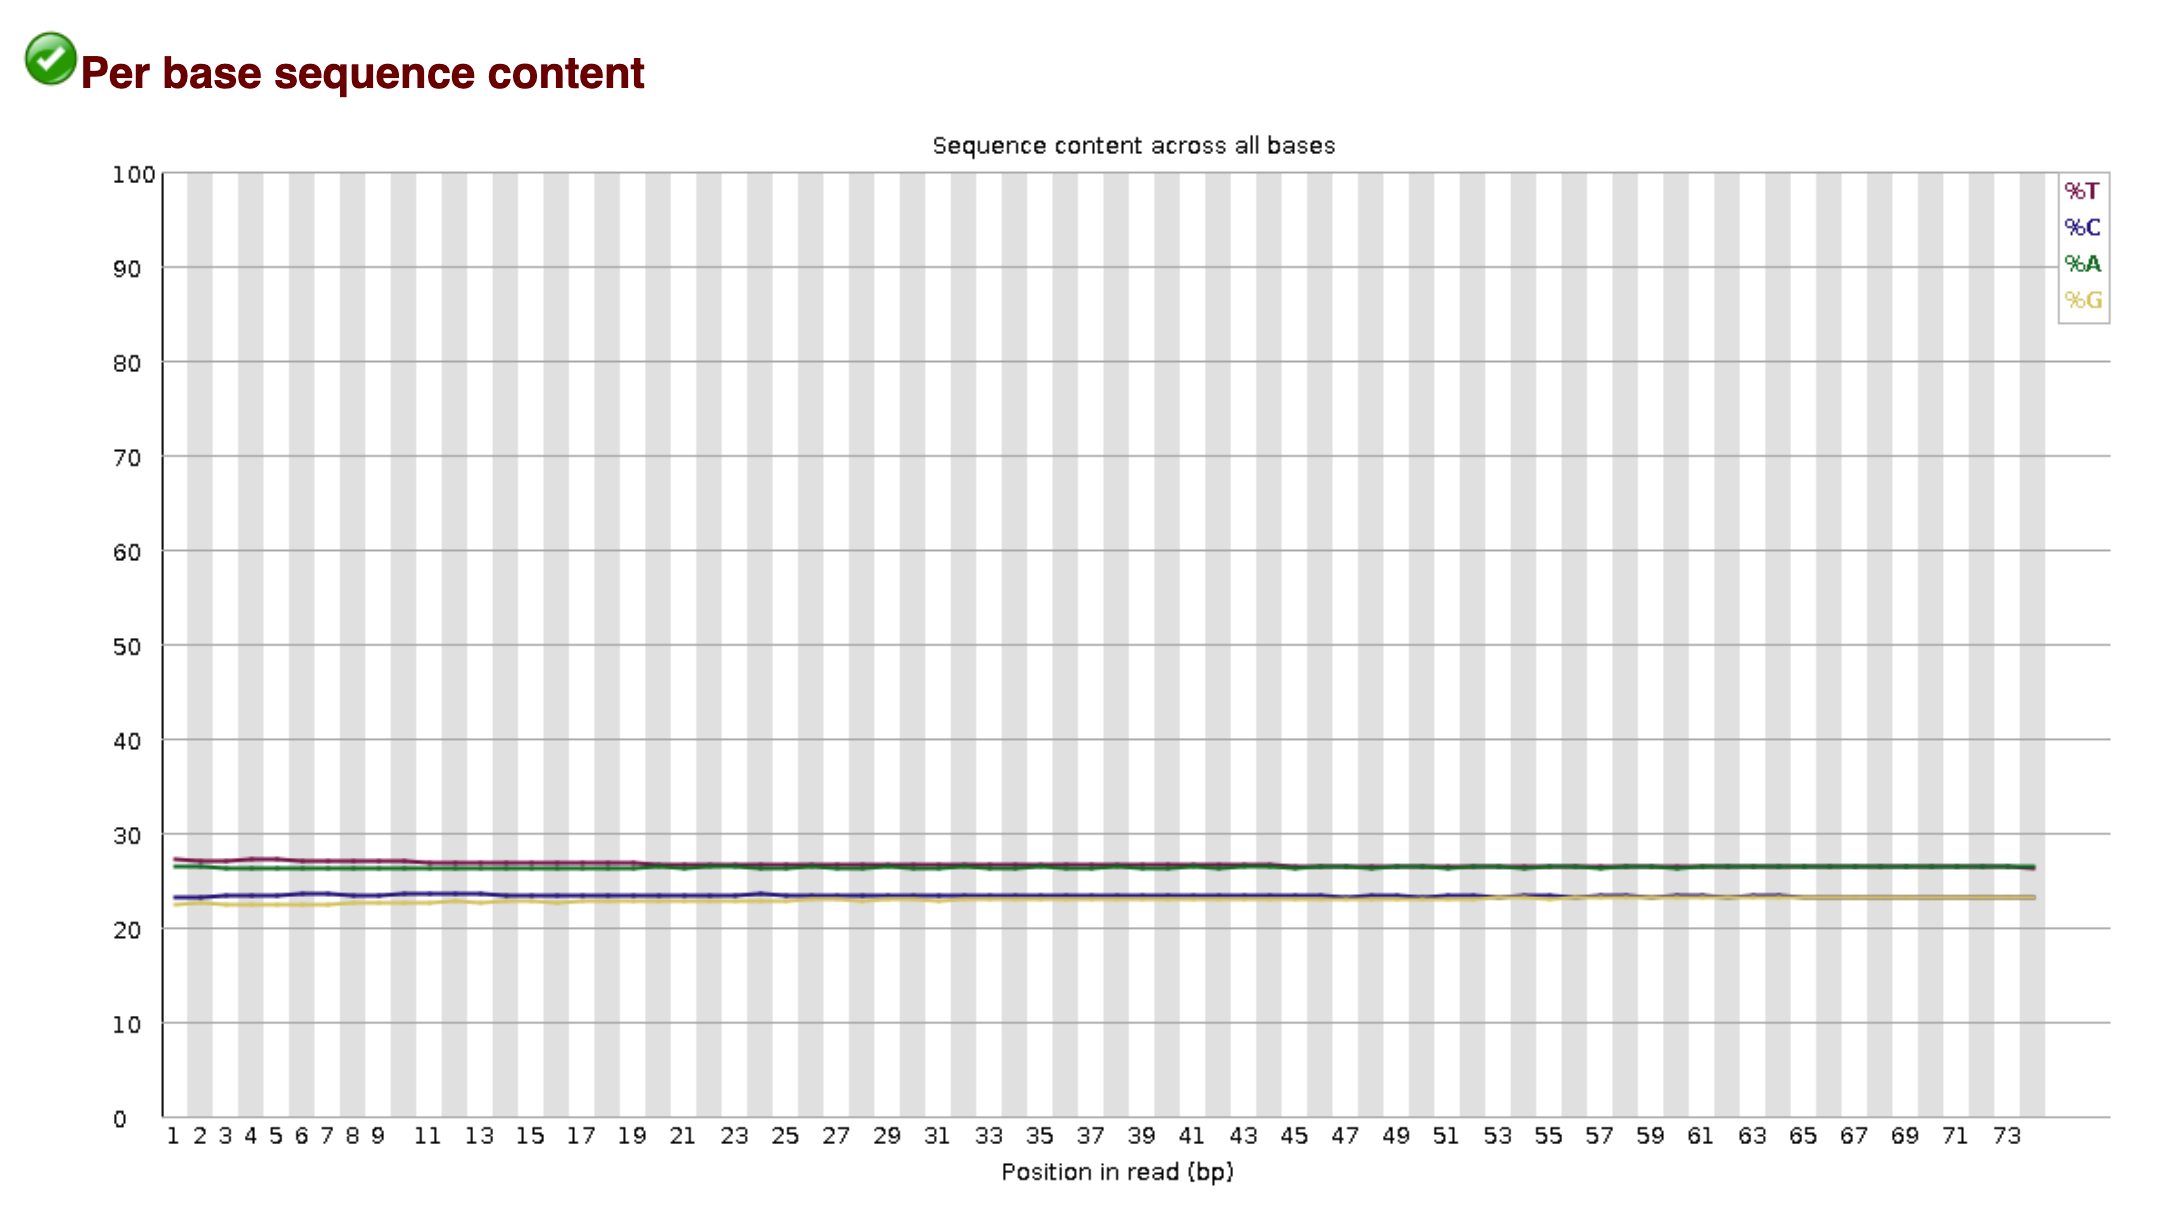

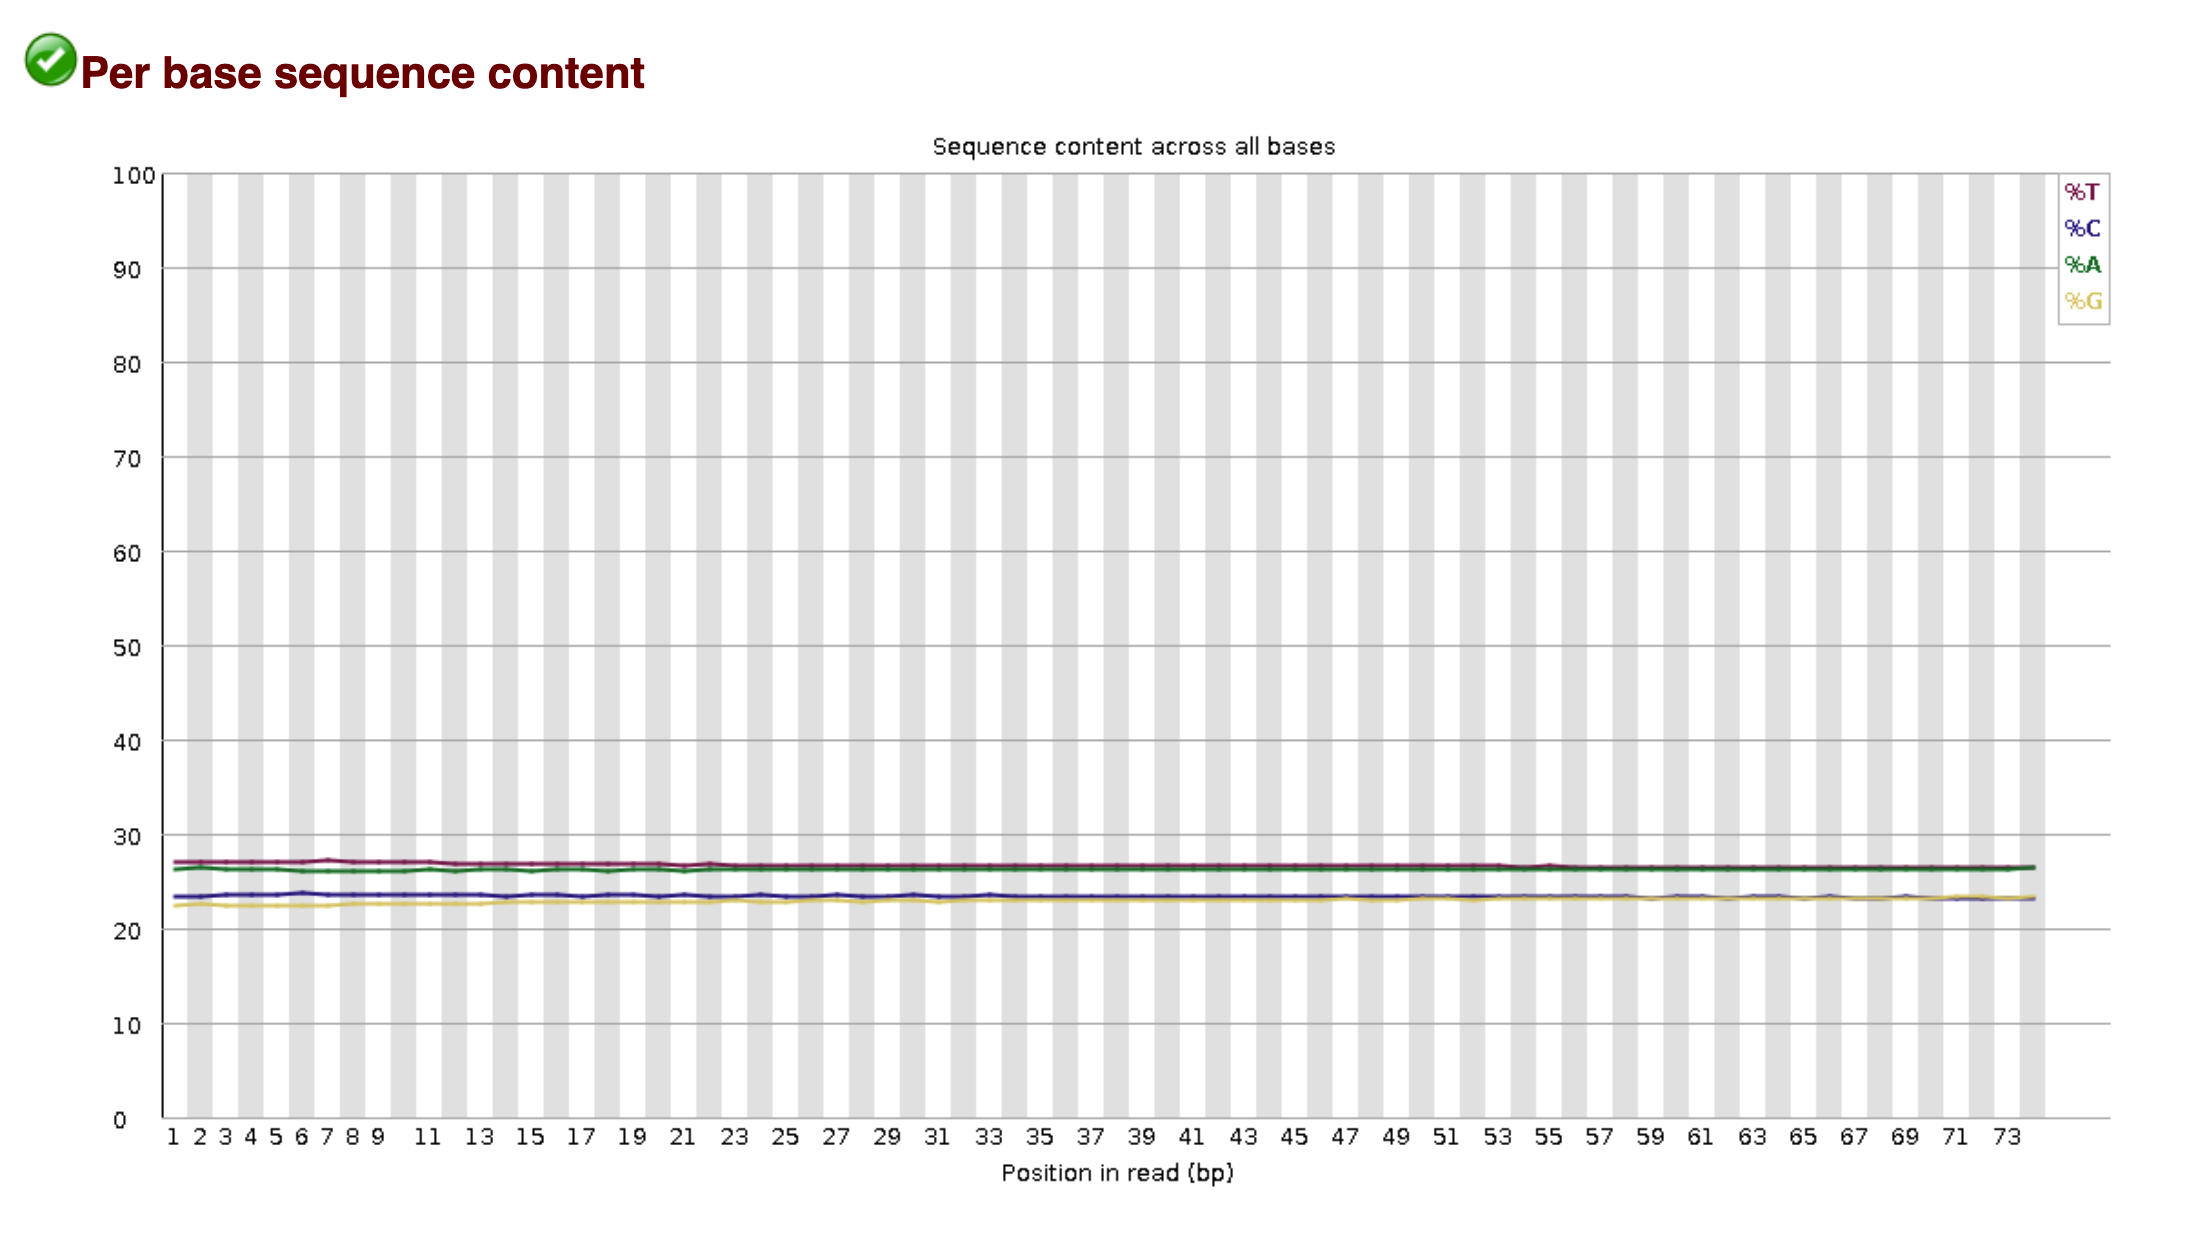